# MATH 3423: Advanced Linear Algebra & Optimization
## Strang Section 4.3. Least Squares Approximations

In this notebook we discuss one of the most beautiful concepts from linear algebra; namely, *least squares approximations*. This notion is motivated by the fact that in many instances, $Ax = b$ has no solution, and the usual reason is *too many equations*. In this instance, we cannot get the *error* $e = b - Ax$ down to zero. When the length of $e$ is as small as possible, $\hat{x}$ is the least squares solution*. 

**Example:** Consider the following points: $\{(0,0), (1,8), (3,8), (4,20)\}$. 

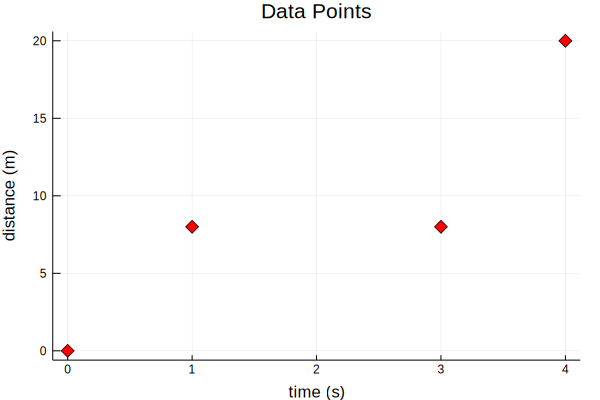

In [14]:
using Plots
points = [(0,0), (1,8), (3,8), (4,20)]
b = [0, 8, 8, 20]
scatter(points, label="data points", legend = false, markershapes = :diamond, 
    markercolor = :red, markersize = :6, title = "Data Points",
    xlabel = "time (s)", ylabel = "distance (m)")

Of course no straight line $b = C + Dt$ goes through all of these points; so we seek to find a line that best *approximates* the above data points. Here are the four equations for $t = 0, 1, 3, 4$, 

$$
C + D0 = 0
$$

$$
C + D1 = 8
$$

$$
C + D3 = 8
$$

$$
C + D4 = 20
$$

We may write this system of equations with the following matrix vector equation. 

$$
\begin{bmatrix}
   1 & 0 \\
   1 & 1 \\
   1 & 3 \\
   1 & 4
\end{bmatrix}
\begin{bmatrix}
   C \\
   D
\end{bmatrix}
=
\begin{bmatrix}
   0 \\
   8 \\
   8 \\
   20
\end{bmatrix}
$$

Below we plot the ideal solution (line) that fits our optimization task. 

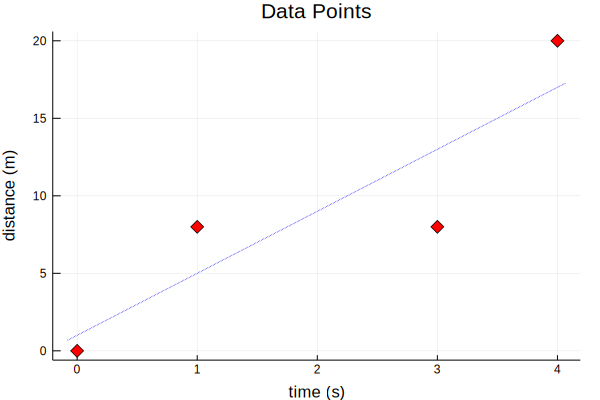

In [15]:
plot!(x -> 1.0 + 4.0*x, line = :dot, color = "blue")

**Geometry.** Every vector $Ax$ lies in the column space of $A$, and more specifically, the closest point to $b$ in the column space of $A$ is the projection of $b$ onto the column space of $A$. The best choice for $A\hat{x}$ is $p$, where the smallest possible error is $e = b - p$. Further, it is important to remember $e \in \mathcal{C}(A)^\perp$. In fitting a straight line, $\hat{x}$ is the best choice for $(C, D)$. 

**Algebra.** Every vector $b$ splits into two parts, the part in the column space ($p$), and the perpendicular part ($e$). We cannot solve $Ax=b$, but we can solve $A\hat{x} = p$. The solution to $A\hat{x} = p$ has the least possible error (which is $e$). Note that 

$$
||Ax - b||^2 = ||Ax - p||^2 + ||e||^2. 
$$

Thus, **the least squares solution $\hat{x}$ makes** 

$$
E = ||Ax - b||^2
$$ 

**as small as possible.** The least squares line minimizes the squared error: $E = e_{1}^2 + e_{2}^2 + e_{3}^2 + e_{4}^2$. 

**Calculus.** We may also use calculus to optimize the function

$$
E(C, D) = ||Ax - b||^2 = (C + D0)^2 + (C + D1)^2 + (C + D3)^2 + (C + D4)^2,
$$

where $E$ is a function of two variables. More specifically, we find the point where the *gradient* of $E$ is equal to zero, where this gradient is 

$$
\nabla E = 
\begin{bmatrix}
   \frac{\partial E}{\partial C}\\
   \frac{\partial E}{\partial D}.
\end{bmatrix}
$$

Notice that **the equations implied by this system are identical with** $A^{T}A\hat{x} = A^{T}b$. The best $C$ and $D$ are the components of $\hat{x}$. 

**The partial derivatives of $||Ax - b||^2$ are zero when $A^{T}A\hat{x} = A^{T}b$.**

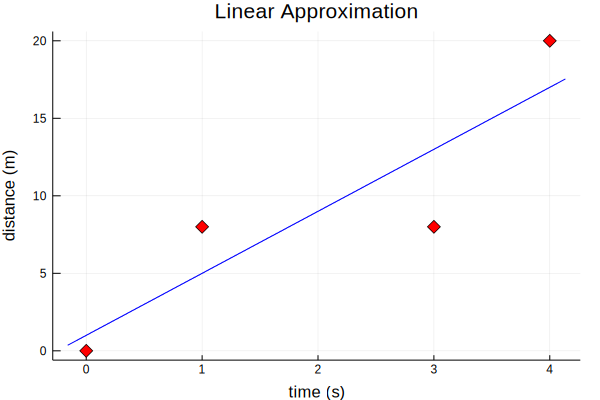

In [16]:
A = [1 0; 1 1; 1 3; 1 4]
x_hat = (A'*A)\(A'*b)
plot!(x -> x_hat[1] + x_hat[2]*x, color = "blue", title = "Linear Approximation")

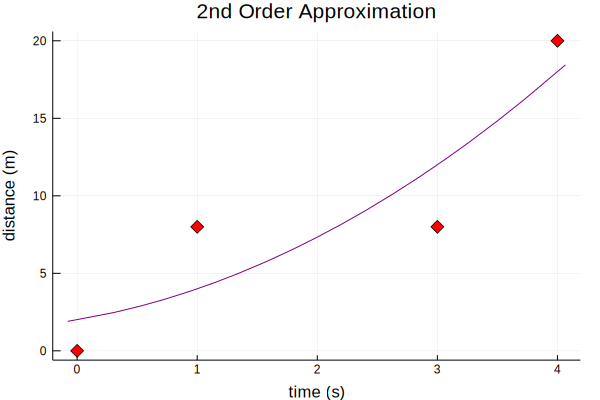

In [12]:
points = [(0,0), (1,8), (3,8), (4,20)]
scatter(points, label="data points", legend = false, markershapes = :diamond, 
    markercolor = :red, markersize = :6, title = "2nd Order Approximation",
    xlabel = "time (s)", ylabel = "distance (m)")

A = [1 0 0; 1 1 1; 1 3 9; 1 4 16]
x_hat = (A'*A)\(A'*b)
plot!(x -> x_hat[1] + x_hat[2]*x + x_hat[3]*x^2, color = "purple")

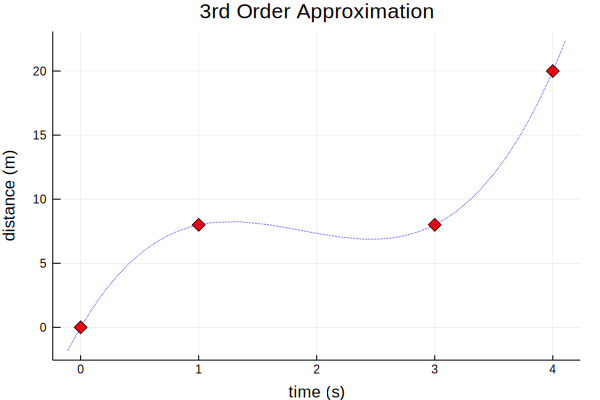

In [17]:
points = [(0,0), (1,8), (3,8), (4,20)]
scatter(points, label="data points", legend = false, markershapes = :diamond, 
    markercolor = :red, markersize = :6, title = "3rd Order Approximation",
    xlabel = "time (s)", ylabel = "distance (m)")

A = [1 0 0 0; 1 1 1 1; 1 3 9 27; 1 4 16 64]
x_hat = (A'*A)\(A'*b)
plot!(x -> x_hat[1] + x_hat[2]*x + x_hat[3]*x^2 + x_hat[4]*x^3,
        line = :dot, color="blue")